In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
# Parametros
E, R, L, C = [12.0, 6.0, 1.0, 1.0]
# EDO NÃO LINEAR
def edo_nlinear(t,X,V):
  V, I = X
  dVdt=(I-(18*(V_ss)-104*(V_ss**2)+230*(V_ss**3)-226*(V_ss**4)+84*(V_ss**5)))/C
  dIdt = (E-V-R*I)/L
  return [dVdt,dIdt]
 # Calculo do estacionário
V_ss = 0.5
I0 = (18*(V_ss)-104*(V_ss**2)+230*(V_ss**3)-226*(V_ss**4)+84*(V_ss**5))
V0 = E-I0
X_ss = fsolve(lambda X: edo_nlinear(0,X,V_ss), [V0,I0])
print(f'X_ss = {X_ss}')




X_ss = [10.5   0.25]


In [4]:
# Simulação das EDO V
tsim = np.linspace(0,60,100)
V = np.zeros(tsim.shape)
X_nlin = np.zeros((2,len(tsim)))
X_lin = X_nlin.copy()
# Condiçao inicial
X_nlin[:,0] = X_ss
X_lin[:,0] = X_nlin[:,0] - X_ss # Variável desvio
V[0] = V_ss


for i in range(1,len(tsim)):
  # Degrau na Tensão da Fonte
  if tsim[i] <= 20:
    V[i] = 10.5
  elif tsim[i] <= 40:
    V[i] = 12.0
  elif tsim[i] <= 60:
    V[i] = 12.0
  elif tsim[i] <= 80:
    V[i] = 12.0
    V[i] = V[i-1]
  # Solução não linear X
  sol_nlin = solve_ivp(edo_nlinear, [tsim[i-1],tsim[i]], X_nlin[:,i-1], args=(V[i-1],))
  X_nlin[:,i] = sol_nlin.y[:,-1]

  # Solução linear X
  #sol_lin = solve_ivp(edo_linear, [tsim[i-1],tsim[i]], [h_lin[i-1]], args=(q[i-1]-q_ss,))
  #h_lin[i] = sol_lin.y[0,4]

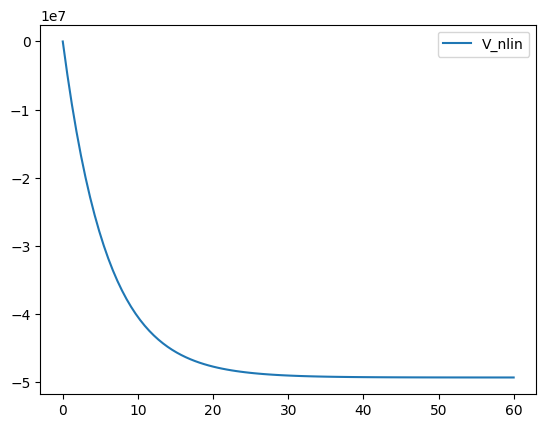

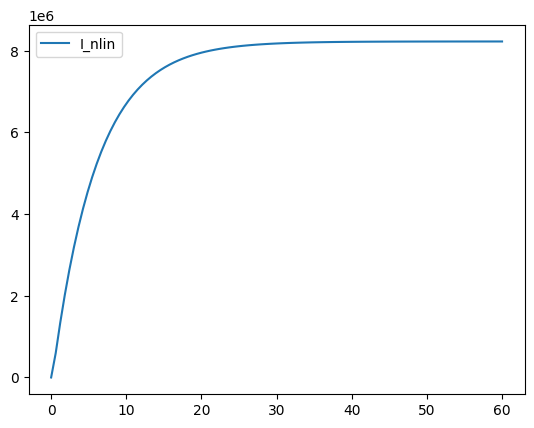

In [5]:
V_nlin = X_nlin[0,:]
V_ss = X_ss[0]
plt.plot(tsim,V_nlin,label='V_nlin')
#plt.plot(tsim,i_lin+i_ss,label='i_lin')
plt.legend()
plt.show()


I_nlin = X_nlin[1,:]
I_ss = X_ss[1]
plt.figure()
plt.plot(tsim,I_nlin,label='I_nlin')
#plt.plot(tsim,I_lin+I_ss,label='I_lin')
plt.legend()
plt.show()